In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("traindata.csv")
train.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,7,20,Friday,7.192192e+09,1,FROZEN FOODS,9117.0
1,7,20,Friday,6.811311e+10,2,SERVICE DELI,4010.0
2,25,28,Friday,8.805520e+11,1,LADIESWEAR,313.0
3,25,28,Friday,8.085947e+10,1,LADIESWEAR,4447.0
4,25,28,Friday,4.900004e+09,1,DSD GROCERY,9538.0


In [4]:
test = pd.read_csv("testdata.csv")
test.head()

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,87,Friday,7.106841e+09,1,FROZEN FOODS,4063
1,361,Friday,6.727878e+10,1,MENS WEAR,1605
2,385,Friday,2.840007e+09,1,DSD GROCERY,4551
3,413,Friday,2.200000e+09,1,IMPULSE MERCHANDISE,135
4,462,Friday,7.282133e+10,1,PLUS AND MATERNITY,744


In [5]:
train.shape

(77186, 7)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77186 entries, 0 to 77185
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TripType               77186 non-null  int64  
 1   VisitNumber            77186 non-null  int64  
 2   Weekday                77186 non-null  object 
 3   Upc                    77186 non-null  float64
 4   ScanCount              77186 non-null  int64  
 5   DepartmentDescription  77186 non-null  object 
 6   FinelineNumber         77186 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 4.1+ MB


In [7]:
train.duplicated().sum()

1082

In [8]:
train = train.drop_duplicates()

In [9]:
train['TripType'].nunique()

3

In [10]:
train['TripType'].unique()

array([ 7, 25, 38], dtype=int64)

In [11]:
train['TripType'].value_counts()

TripType
38    28352
25    25694
7     22058
Name: count, dtype: int64

Text(0.5, 1.0, 'Frequency of TripTypes')

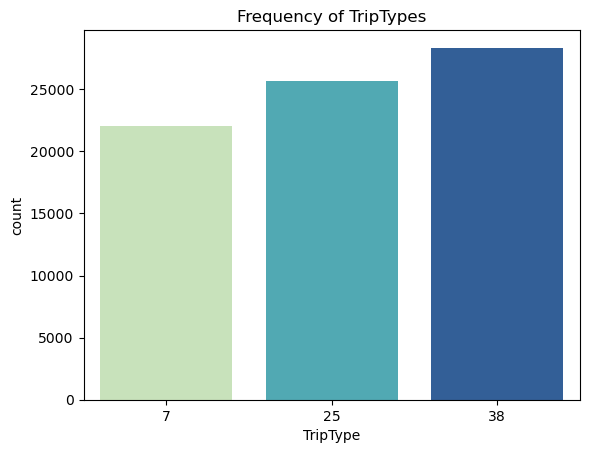

In [12]:
sns.countplot(data = train, x = 'TripType', palette = 'YlGnBu' )
plt.title('Frequency of TripTypes')

#### Trip 38 is the most freguently occuring trip type

In [13]:
#avg quantity is brought in each TripType 

c_r = train.groupby(['TripType'])['ScanCount'].mean().reset_index()
c_r

,TripType,ScanCount
0,7,1.167014
1,25,1.060481
2,38,1.176425


In [14]:
c = train.groupby(['VisitNumber','TripType'])['ScanCount'].sum().reset_index()
c

,VisitNumber,TripType,ScanCount
0,20,7,3
1,28,25,8
2,43,38,4
3,72,7,3
4,76,7,4
...,...,...,...
12304,191318,7,7
12305,191322,38,15
12306,191326,38,11
12307,191337,38,26


In [15]:
c_r = c.groupby(['TripType'])['ScanCount'].mean().reset_index()
c_r

,TripType,ScanCount
0,7,4.516933
1,25,7.368307
2,38,11.453984


Text(0.5, 1.0, 'Avg Qty per TripType')

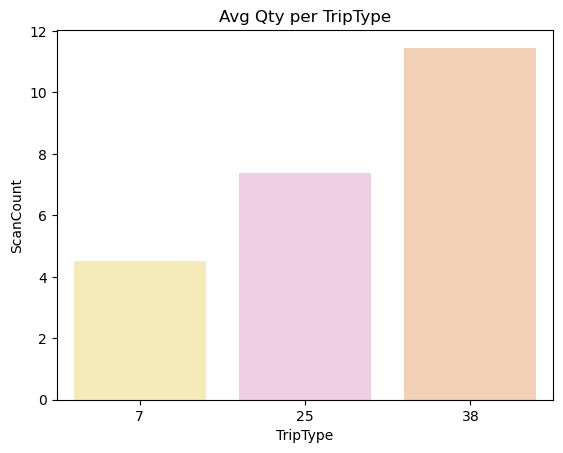

In [16]:
sns.barplot(data = c_r, x = 'TripType', y = 'ScanCount', palette = 'Pastel2_r')
plt.title('Avg Qty per TripType')

#### TripType 38 has bulkshoppers,  customers buying more in Qty, more basket Size

In [17]:
# Hypothesis is TripType Dependent on weekdays

w = train.groupby(['TripType','Weekday']).size().reset_index(name = 'Count')
w

,TripType,Weekday,Count
0,7,Friday,3065
1,7,Monday,3113
2,7,Saturday,3430
3,7,Sunday,3821
4,7,Thursday,2731
5,7,Tuesday,2811
6,7,Wednesday,3087
7,25,Friday,4073
8,25,Monday,2718
9,25,Saturday,5221


In [18]:
w_o = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
w['Weekday'] = pd.Categorical(w['Weekday'], categories = w_o, ordered = True)
w.replace([np.inf, -np.inf], np.nan, inplace=True)
w

,TripType,Weekday,Count
0,7,Friday,3065
1,7,Monday,3113
2,7,Saturday,3430
3,7,Sunday,3821
4,7,Thursday,2731
5,7,Tuesday,2811
6,7,Wednesday,3087
7,25,Friday,4073
8,25,Monday,2718
9,25,Saturday,5221


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Weekdays vs Trips Type')

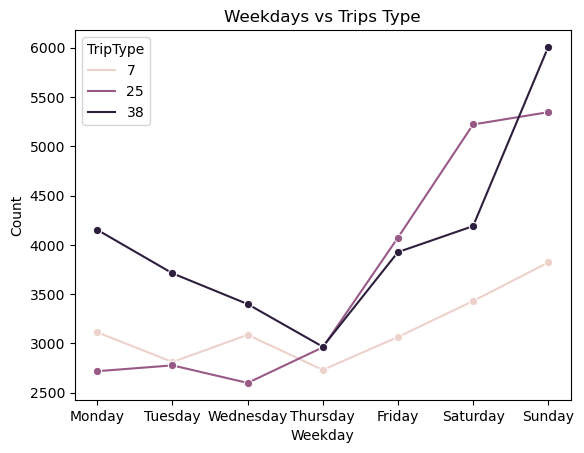

In [19]:
sns.lineplot(data = w, x = 'Weekday', y = 'Count', hue = 'TripType', marker = 'o')
plt.title("Weekdays vs Trips Type")

#### On weekends max visits occur, 
#### TripType 38 visits mostly on Sundays and Mondays
#### TripType 25 tend to not visit mostly on weekdays

In [20]:
d = train.groupby(['TripType','DepartmentDescription']).size().reset_index(name = 'c')
d

,TripType,DepartmentDescription,c
0,7,1-HR PHOTO,3
1,7,ACCESSORIES,11
2,7,AUTOMOTIVE,30
3,7,BAKERY,849
4,7,BATH AND SHOWER,5
...,...,...,...
178,38,SHOES,41
179,38,SLEEPWEAR/FOUNDATIONS,24
180,38,SPORTING GOODS,24
181,38,TOYS,56


In [21]:
td = d.groupby('TripType').apply(lambda x:x.nlargest(4,'c')).reset_index(drop = True)
td

,TripType,DepartmentDescription,c
0,7,SERVICE DELI,3519
1,7,GROCERY DRY GOODS,3184
2,7,PRODUCE,2863
3,7,FROZEN FOODS,2142
4,25,MENS WEAR,5081
5,25,LADIESWEAR,3163
6,25,"GIRLS WEAR, 4-6X AND 7-14",1671
7,25,BOYS WEAR,1585
8,38,DAIRY,6937
9,38,GROCERY DRY GOODS,6214


Text(0.5, 1.0, 'Top 4 departments for each TripType')

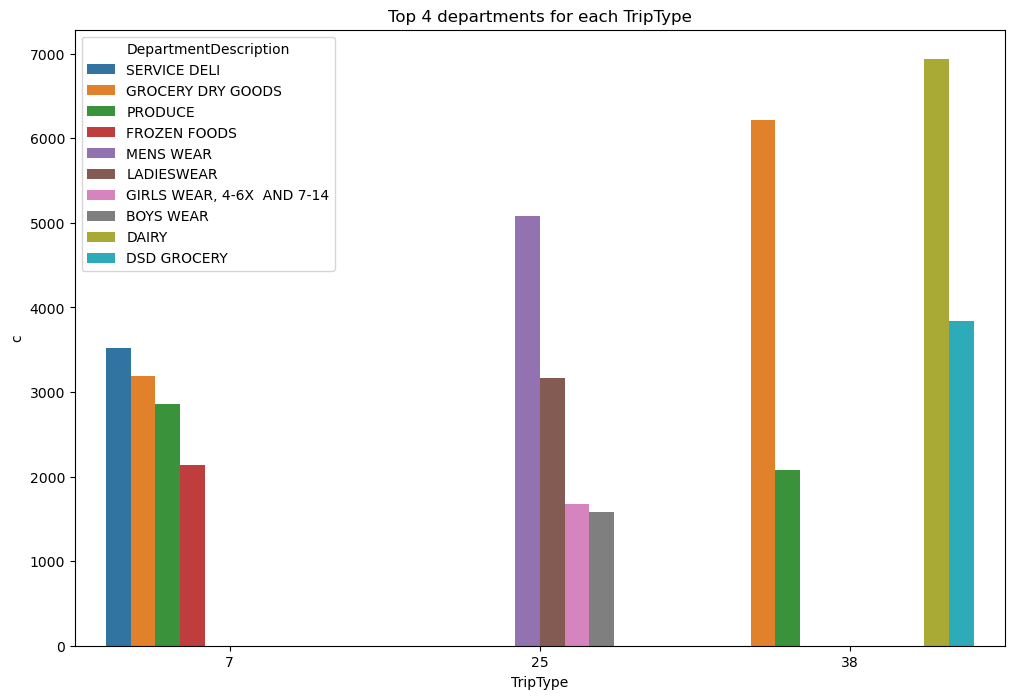

In [22]:
plt.figure(figsize = (12,8))
sns.barplot(data = td, x = 'TripType', y = 'c', hue = 'DepartmentDescription')
plt.title("Top 4 departments for each TripType")

#### TripType 38 buys daily item More
#### TripType 25 buys Garments More

In [23]:
#Classification
train.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,7,20,Friday,7.192192e+09,1,FROZEN FOODS,9117.0
1,7,20,Friday,6.811311e+10,2,SERVICE DELI,4010.0
2,25,28,Friday,8.805520e+11,1,LADIESWEAR,313.0
3,25,28,Friday,8.085947e+10,1,LADIESWEAR,4447.0
4,25,28,Friday,4.900004e+09,1,DSD GROCERY,9538.0


In [24]:
test.head()

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,87,Friday,7.106841e+09,1,FROZEN FOODS,4063
1,361,Friday,6.727878e+10,1,MENS WEAR,1605
2,385,Friday,2.840007e+09,1,DSD GROCERY,4551
3,413,Friday,2.200000e+09,1,IMPULSE MERCHANDISE,135
4,462,Friday,7.282133e+10,1,PLUS AND MATERNITY,744


In [25]:
t = train.drop(['VisitNumber','Upc','FinelineNumber'],axis = 1)
t

,TripType,Weekday,ScanCount,DepartmentDescription
0,7,Friday,1,FROZEN FOODS
1,7,Friday,2,SERVICE DELI
2,25,Friday,1,LADIESWEAR
3,25,Friday,1,LADIESWEAR
4,25,Friday,1,DSD GROCERY
...,...,...,...,...
77181,25,Sunday,2,MENS WEAR
77182,25,Sunday,2,DSD GROCERY
77183,25,Sunday,1,IMPULSE MERCHANDISE
77184,25,Sunday,1,MENS WEAR


In [26]:
#Pre Processing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [27]:
le = LabelEncoder()
for col in t.select_dtypes(include = ['object']):
    t[col] = le.fit_transform(t[col])

In [28]:
t.head()

,TripType,Weekday,ScanCount,DepartmentDescription
0,7,0,1,20
1,7,0,2,56
2,25,0,1,35
3,25,0,1,35
4,25,0,1,16


In [29]:
#TripType is our dependent variable
x = t.drop(['TripType'], axis = 1)
x

,Weekday,ScanCount,DepartmentDescription
0,0,1,20
1,0,2,56
2,0,1,35
3,0,1,35
4,0,1,16
...,...,...,...
77181,3,2,40
77182,3,2,16
77183,3,1,30
77184,3,1,40


In [30]:
y = t['TripType']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 14)

In [32]:
model = RandomForestClassifier(n_estimators=100, random_state = 14)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=14)

In [33]:
#Evaluate the model
y_pred = model.predict(x_test)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           7       0.65      0.55      0.59      4445
          25       0.82      0.81      0.82      5084
          38       0.63      0.72      0.67      5692

    accuracy                           0.70     15221
   macro avg       0.70      0.69      0.69     15221
weighted avg       0.70      0.70      0.70     15221



In [35]:
te = test.drop(['VisitNumber','Upc','FinelineNumber'],axis = 1)
te

,Weekday,ScanCount,DepartmentDescription
0,Friday,1,FROZEN FOODS
1,Friday,1,MENS WEAR
2,Friday,1,DSD GROCERY
3,Friday,1,IMPULSE MERCHANDISE
4,Friday,1,PLUS AND MATERNITY
...,...,...,...
2995,Sunday,5,FROZEN FOODS
2996,Sunday,1,DAIRY
2997,Sunday,1,DAIRY
2998,Sunday,1,MENS WEAR


In [36]:
le = LabelEncoder()
for col in te.select_dtypes(include = ['object']):
    te[col] = le.fit_transform(te[col])

In [37]:
te

,Weekday,ScanCount,DepartmentDescription
0,0,1,18
1,0,1,37
2,0,1,14
3,0,1,27
4,0,1,45
...,...,...,...
2995,3,5,18
2996,3,1,13
2997,3,1,13
2998,3,1,37


In [38]:
test_pred = model.predict(te)
test_pred

array([25, 25, 25, ..., 38, 38, 25], dtype=int64)

In [39]:
sub = pd.DataFrame({'VisitNumber':test['VisitNumber'],'TripType':test_pred})
sub

,VisitNumber,TripType
0,87,25
1,361,25
2,385,25
3,413,25
4,462,25
...,...,...
2995,191158,38
2996,191164,38
2997,191225,38
2998,191256,38


In [41]:
sub.to_csv("Pred_data.csv")